In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV

1

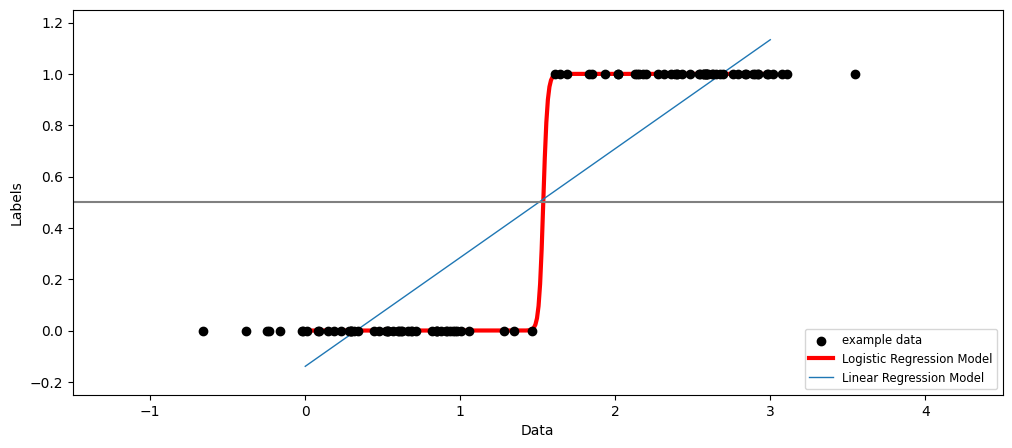

In [26]:
def uno_abc():
    mu1, sigma1 = 0.5, 0.5
    mu2, sigma2 = 2.5, 0.5
    num_samples = 50

    class1_data = np.random.normal(mu1, sigma1, num_samples)

    class2_data = np.random.normal(mu2, sigma2, num_samples)

    class1_labels = np.zeros(num_samples)  # Etiqueta 0 para la clase 0
    class2_labels = np.ones(num_samples)   # Etiqueta 1 para la clase 1

    data = np.concatenate((class1_data, class2_data))
    labels = np.concatenate((class1_labels, class2_labels))

    data = data[:, np.newaxis]
    #data = data.reshape((-1, 1))

    # Fit the classifier
    clf = LogisticRegression(C=1e5)
    clf.fit(data, labels)

    # and plot the result
    plt.figure(1, figsize=(12, 5))
    plt.clf()
    plt.scatter(data.ravel(), labels, label="example data", color="black", zorder=20)
    X_test = np.linspace(0, 3, 300)

    loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
    plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

    ols = LinearRegression()
    ols.fit(data, labels)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, label="Linear Regression Model", linewidth=1)
    plt.axhline(0.5, color=".5")

    plt.ylabel("Labels")
    plt.xlabel("Data")

    plt.ylim(-0.25, 1.25)
    plt.xlim(-1.5, 4.5)
    plt.legend(
        loc="lower right",
        fontsize="small",
    )
    plt.show()
uno_abc()

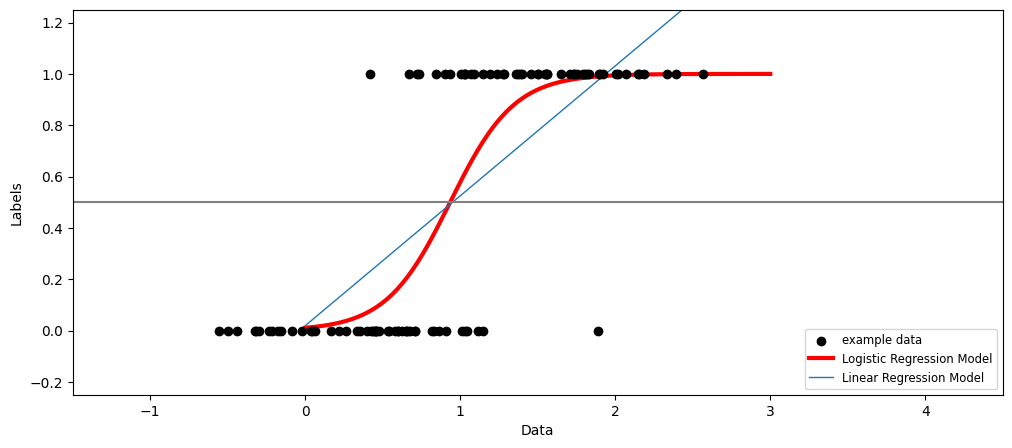

In [27]:
def uno_e():
    mu1, sigma1 = 0.5, 0.5
    mu2, sigma2 = 1.5, 0.5
    num_samples = 50

    class1_data = np.random.normal(mu1, sigma1, num_samples)

    class2_data = np.random.normal(mu2, sigma2, num_samples)

    class1_labels = np.zeros(num_samples)  # Etiqueta 0 para la clase 0
    class2_labels = np.ones(num_samples)   # Etiqueta 1 para la clase 1

    data = np.concatenate((class1_data, class2_data))
    labels = np.concatenate((class1_labels, class2_labels))

    data = data[:, np.newaxis]
    #data = data.reshape((-1, 1))

    # Fit the classifier
    clf = LogisticRegression(C=1e5)
    clf.fit(data, labels)

    # and plot the result
    plt.figure(1, figsize=(12, 5))
    plt.clf()
    plt.scatter(data.ravel(), labels, label="example data", color="black", zorder=20)
    X_test = np.linspace(0, 3, 300)

    loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
    plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

    ols = LinearRegression()
    ols.fit(data, labels)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, label="Linear Regression Model", linewidth=1)
    plt.axhline(0.5, color=".5")

    plt.ylabel("Labels")
    plt.xlabel("Data")

    plt.ylim(-0.25, 1.25)
    plt.xlim(-1.5, 4.5)
    plt.legend(
        loc="lower right",
        fontsize="small",
    )
    plt.show()
uno_e()

2

              precision    recall  f1-score   support

   malignant       0.91      0.98      0.95        53
      benign       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



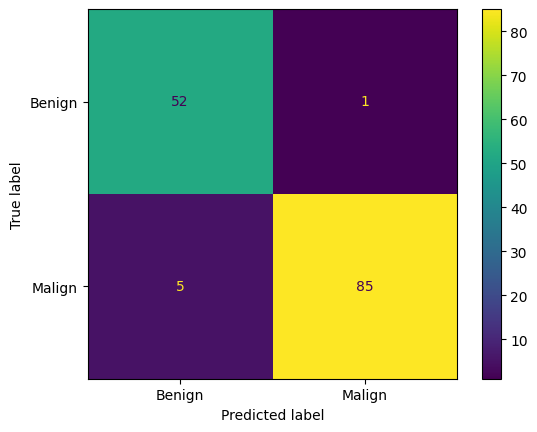

In [32]:
def Percep():
    cancer = load_breast_cancer()

    cancer_d = cancer.data
    cancer_l = cancer.target
    labels_names = cancer.target_names

    X_train, X_test, y_train, y_test = train_test_split(
        cancer_d, cancer_l, test_size = 0.25, stratify = cancer_l
    )

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    model = Perceptron()

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, target_names=labels_names))

    labels = ["Benign", "Malign"]
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
Percep()

              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        53
      benign       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



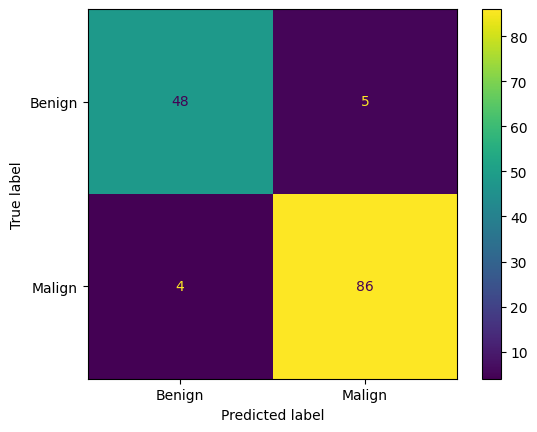

In [29]:
def NB():
    cancer = load_breast_cancer()

    cancer_d = cancer.data
    cancer_l = cancer.target
    labels_names = cancer.target_names

    X_train, X_test, y_train, y_test = train_test_split(
        cancer_d, cancer_l, test_size = 0.25, stratify = cancer_l
    )

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    model = GaussianNB()

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, target_names=labels_names))

    labels = ["Benign", "Malign"]
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
NB()

3

              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        53
      benign       0.99      1.00      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



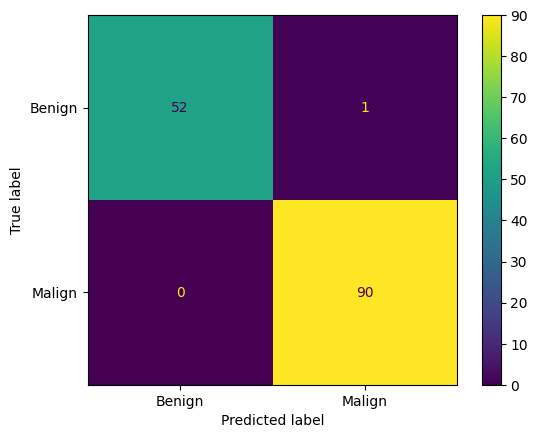

In [33]:
def LRCV():
    cancer = load_breast_cancer()

    cancer_d = cancer.data
    cancer_l = cancer.target
    labels_names = cancer.target_names

    X_train, X_test, y_train, y_test = train_test_split(
        cancer_d, cancer_l, test_size = 0.25, stratify = cancer_l
    )

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    model = LogisticRegressionCV(cv=5, penalty='l2',solver='liblinear', tol=1e-6, max_iter=int(1e6))

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, target_names=labels_names))

    labels = ["Benign", "Malign"]
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
LRCV()